In [99]:
library(tidyverse)
library(MVA)
library(FactoMineR)
library(MASS)

$$
\begin{align*}
& \text{Ex. 4.1 Consider 51 objects}~O_1, ..., O_{51}~ \text{assumed to be arranged along a straight line with the}\\
& \text{jth object being located at a point with coordinate}~j. ~ \text{Define the similarity }s_{ij}~ \text{between object }i~\text{and object }j~\text{as} \\
& s_{ij} = \begin{cases}
9 & \text{if} & i = j \\
8 & \text{if} & 1 \leq |i-j|\leq 3\\
7 & \text{if} & 4 \leq |i-j| \leq 6 \\
\cdots \\
1 & \text{if} & 22 \leq |i-j| \leq 24 \\
0 & \text{if} & |i-j| \geq 25. 
\end{cases}\\
& \text{Convert these similarities into dissimilarities }(\delta_{ij}) ~\text{by using} \\
& \begin{equation*} \delta_{ij} = \sqrt{s_{ii} + s_{jj} -2s_{ij}} \end{equation*} \\
& \text{and then apply classical multidimensional scaling to the resulting dissimalarity matrix. Explain the shape of the derrived two-dimensional soloution.}
\end{align*}
$$

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,⋯,O42,O43,O44,O45,O46,O47,O48,O49,O50,O51
O1,0.000,1.414,1.414,1.414,2.000,2.000,2.000,2.449,2.449,2.449,⋯,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243
O2,1.414,0.000,1.414,1.414,1.414,2.000,2.000,2.000,2.449,2.449,⋯,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243
O3,1.414,1.414,0.000,1.414,1.414,1.414,2.000,2.000,2.000,2.449,⋯,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243
O4,1.414,1.414,1.414,0.000,1.414,1.414,1.414,2.000,2.000,2.000,⋯,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243
O5,2.000,1.414,1.414,1.414,0.000,1.414,1.414,1.414,2.000,2.000,⋯,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243
O6,2.000,2.000,1.414,1.414,1.414,0.000,1.414,1.414,1.414,2.000,⋯,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243,4.243


[1] 0.5225694 0.5225694

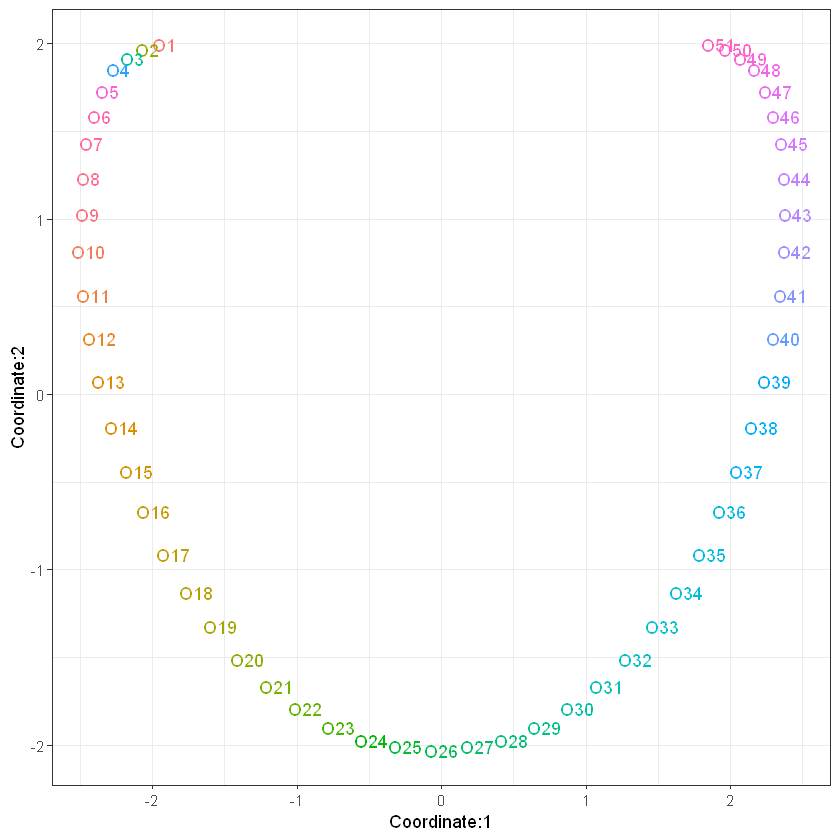

In [100]:
fun <- function(i, j){
if(i == j) return(9) else{
    if(abs(i-j) <= 3 && abs(i-j) >= 1) return(8) else{
        if(abs(i-j) >= 4 && abs(i-j) <= 6) return(7) else{
            if(abs(i-j) >= 7 && abs(i-j) <= 9) return(6) else{
                if(abs(i-j) >= 10 && abs(i-j) <= 12) return(5) else{
                    if(abs(i-j) >= 13 && abs(i-j) <= 15) return(4) else{
                        if(abs(i-j) >= 16 && abs(i-j) <= 18) return(3) else{
                            if(abs(i-j) >= 19 && abs(i-j) <= 21) return(2) else{
                                if(abs(i-j) >= 22 && abs(i-j) <= 24) return(1) else{
                                    if(abs(i-j) >= 25) return(0)
                                }
                            }
                        }
                    }
                }
            }
        }
    }
}
}
f <- Vectorize(fun)
I = 1:51; J = 1:51
mat_dist <- outer(I, J, f)

fun2 <- function(i, j) sqrt(mat_dist[i, i] + mat_dist[j, j] - 2 * mat_dist[i, j])
f2 <- Vectorize(fun2)
mat_s <- outer(I, J, f2)
mat_s <- mat_s %>% round(3)


Nam <- paste("O", 1:51, sep = "")
dimnames(mat_s) = list(Nam, Nam)
head(mat_s) 
Model <- cmdscale(mat_s, add = TRUE)
Model$GOF
dims <- Model$points
dims %>% 
as.data.frame %>%
rownames_to_column(var = "objects") %>%
setNames(c("objects", "Coordinate:1", "Coordinate:2")) %>%
ggplot(aes(x = `Coordinate:1`, y = `Coordinate:2`)) +
geom_text(aes(label = objects, color = objects)) + theme_bw() + 
guides(color = 'none')

#### Ex. 4.2 Write an R function to calculate the chi-squared distance matrices for both rows and columns in a two-dimensional contingency table.

0.000000000,0.007287197,0.0662686,0.4394288,1.1531616
0.007287197,0.000000000,0.0347609,0.3431714,1.0286712
0.066268601,0.034760903,0.0000000,0.1653301,0.6880144
0.439428812,0.343171356,0.1653301,0.0000000,0.2567891
1.153161646,1.028671234,0.6880144,0.2567891,0.0000000


0.00000000,0.04142629,0.8603405
0.04142629,0.00000000,0.8752194
0.86034052,0.87521945,0.0000000


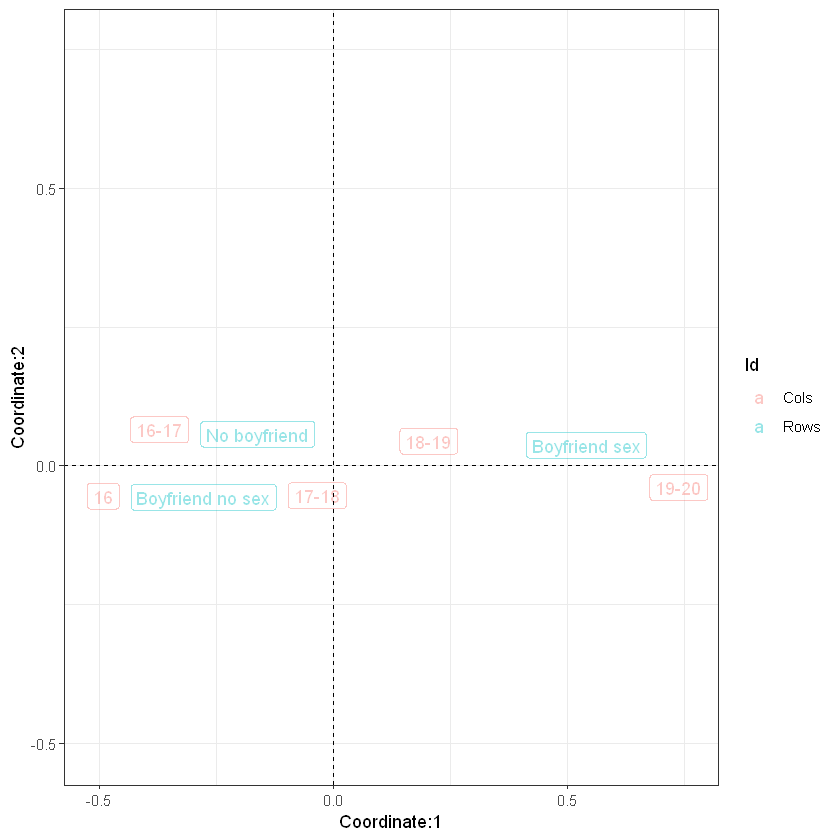

**Results of the Correspondence Analysis (CA)**
The row variable has  3  categories; the column variable has 5 categories
The chi square of independence between the two variables is equal to 20.60424 (p-value =  0.008276439 ).
*The results are available in the following objects:

   name              description                   
1  "$eig"            "eigenvalues"                 
2  "$col"            "results for the columns"     
3  "$col$coord"      "coord. for the columns"      
4  "$col$cos2"       "cos2 for the columns"        
5  "$col$contrib"    "contributions of the columns"
6  "$row"            "results for the rows"        
7  "$row$coord"      "coord. for the rows"         
8  "$row$cos2"       "cos2 for the rows"           
9  "$row$contrib"    "contributions of the rows"   
10 "$call"           "summary called parameters"   
11 "$call$marge.col" "weights of the columns"      
12 "$call$marge.row" "weights of the rows"         

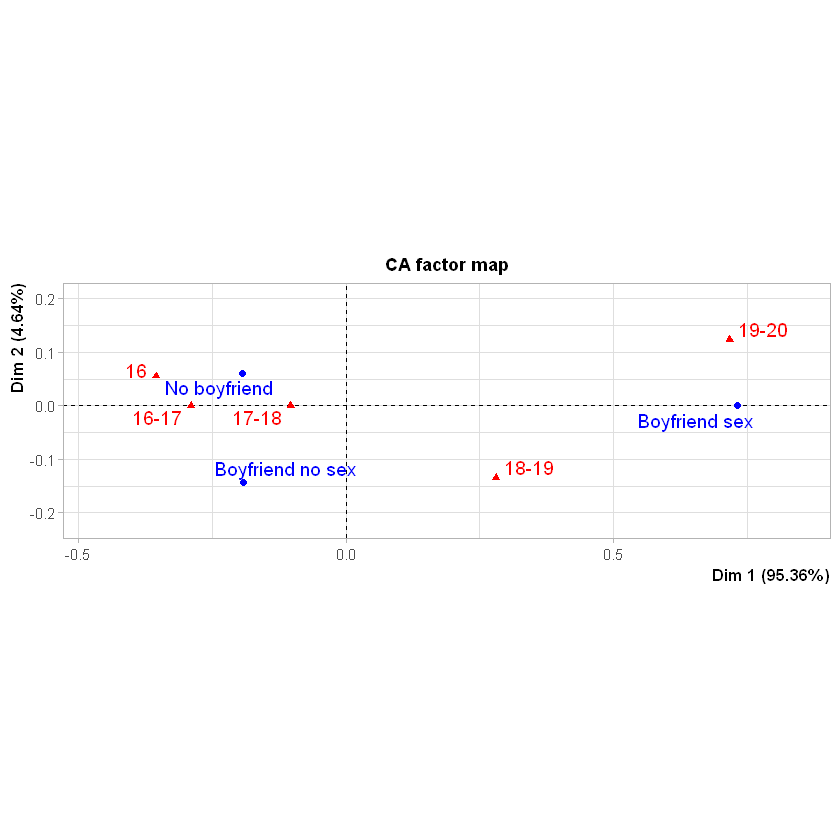

In [106]:
library(ggrepel)
library(FactoMineR)
Teen_sex <- matrix(c(21, 21, 14, 13, 8, 
8, 9, 6, 8, 2, 
2, 3, 4, 10, 10), 3, 5, byrow = T)
cols = c("16", "16-17", "17-18", "18-19", "19-20")
rows = c("No boyfriend", "Boyfriend no sex", "Boyfriend sex")
dimnames(Teen_sex) = list(rows, cols)
dat <- Teen_sex
get_chi_measure <- function(dat, Graph = TRUE){
rr <- nrow(dat)
cc <- ncol(dat)
dcol = matrix(0, cc, cc)
drow = matrix(0, rr, rr)
n <- sum(dat)
cd1 <- colSums(dat)
rd1 <- rowSums(dat)

## for columns
for(i in 1:cc){
    for(j in 1:cc){
        for(k in 1:rr){
            pki = dat[k, i]/cd1[i]
            pkj = dat[k, j] / cd1[j]
           dcol[i, j] = dcol[i, j] +  n/rd1[k] * (pki - pkj)^2
        }
    }
}

## for rows
for(i in 1:rr){
    for(j in 1:rr){
        for(k in 1:cc){
            pik = dat[i, k]/rd1[i]
            pjk = dat[j, k] / rd1[j]
           drow[i, j] = drow[i, j] +  n/cd1[k] * (pik - pjk)^2
        }
    }
}
if(Graph){
c1 <- cmdscale(dcol, eig = TRUE)
r1 <- cmdscale(drow, eig = TRUE)
c1$points -> Dim_cols
r1$points -> Dim_rows
tot <- rbind(Dim_rows, Dim_cols)
coord_res <- extendrange(as.vector(tot))
Labels = unlist(dimnames(dat))
D <- as.data.frame(tot) %>%
mutate(Labels = Labels) %>%
mutate(Id = factor(rep(c("Rows", "Cols"), c(nrow(dat), ncol(dat))))) %>%
setNames(c("Coordinate:1", "Coordinate:2", "Labels", "Id"))
D %>% 
ggplot(aes(x = `Coordinate:1`, y = `Coordinate:2`, color = Id)) + 
geom_label_repel(aes(label = Labels),  alpha = .4) + theme_bw() + 
geom_hline(yintercept = 0, linetype = 2) + 
geom_vline(xintercept = 0, linetype = 2) +
coord_cartesian(xlim = coord_res, ylim = coord_res) -> P
print(P)
}else P <- NULL

return(list(dcols = dcol, drows = drow, Plot = P))
}
res <- get_chi_measure(dat, Graph = TRUE)
res$dcols
res$drows
CA(dat)

#### Ex. 4.3 In Table 4.7 (from Kaufman and Rousseeuw 1990), the dissimilarity matrix of 18 species of garden flowers is shown. Use some form of multidimensional scaling to investigate which species share common properti

In [102]:
dat2 <- read_delim(file =file.choose(), delim = "\n", col_names = FALSE)
n <- nrow(dat2)
mylistResult <- list()
Nam <- c()
mat_res <- matrix(NA, n, n)
for(i in 1:n){
  temp <- dat2[i, 1]$X1
  temp2 <- strsplit(temp, " ")[[1]]
  Nam[i] <- temp2[1]
  temp2 <- temp2[-1]
  res <- temp2 %>% as.numeric
  mat_res[i, 1:i] <- res
  mat_res[1:i, i] <- res
}
dimnames(mat_res) <- list(Nam, Nam)
mat_res



,Begonia,Broom,Camellia,Dahlia,Forget-me-not,Fuchsia,Geranium,Gladiolus,Heather,Hydrangea,Iris,Lily,Lily-of-the-valley,Peony,Pink-carnation,Red-rose,Scotch-rose,Tulip
Begonia,0.00,0.91,0.49,0.47,0.43,0.23,0.31,0.49,0.57,0.76,0.32,0.51,0.59,0.37,0.74,0.84,0.94,0.44
Broom,0.91,0.00,0.67,0.59,0.90,0.79,0.70,0.57,0.57,0.58,0.77,0.69,0.75,0.68,0.54,0.41,0.20,0.50
Camellia,0.49,0.67,0.00,0.59,0.57,0.29,0.54,0.71,0.57,0.58,0.63,0.69,0.75,0.68,0.70,0.75,0.70,0.79
Dahlia,0.47,0.59,0.59,0.00,0.61,0.52,0.44,0.26,0.89,0.62,0.75,0.53,0.77,0.38,0.58,0.37,0.48,0.48
Forget-me-not,0.43,0.90,0.57,0.61,0.00,0.44,0.54,0.49,0.50,0.39,0.46,0.51,0.35,0.52,0.54,0.82,0.77,0.59
Fuchsia,0.23,0.79,0.29,0.52,0.44,0.00,0.24,0.68,0.61,0.61,0.52,0.65,0.63,0.48,0.74,0.71,0.83,0.68
Geranium,0.31,0.70,0.54,0.44,0.54,0.24,0.00,0.49,0.70,0.86,0.60,0.77,0.72,0.63,0.50,0.61,0.74,0.47
Gladiolus,0.49,0.57,0.71,0.26,0.49,0.68,0.49,0.00,0.77,0.70,0.63,0.47,0.65,0.49,0.49,0.64,0.45,0.22
Heather,0.57,0.57,0.57,0.89,0.50,0.61,0.70,0.77,0.00,0.55,0.46,0.51,0.35,0.52,0.36,0.81,0.77,0.59
Hydrangea,0.76,0.58,0.58,0.62,0.39,0.61,0.86,0.70,0.55,0.00,0.47,0.39,0.41,0.39,0.52,0.43,0.38,0.92


In [103]:
flower_model <- isoMDS(mat_res)


initial  value 24.302088 
iter   5 value 19.506086
iter  10 value 19.037993
final  value 18.875447 
converged


In [104]:
Dims <- flower_model$points %>%
as.data.frame %>%
rownames_to_column(var = "flowers") %>%
setNames(c("Flowers", "Coordinate:1", "Coordinate:2"))
Dims

Flowers,Coordinate:1,Coordinate:2
<chr>,<dbl>,<dbl>
Begonia,0.224370573,-0.12838843
Broom,-0.376790734,-0.15462402
Camellia,0.409138570,-0.16496225
Dahlia,-0.057170851,-0.23616388
Forget-me-not,0.211650639,0.10569174
Fuchsia,0.314199225,-0.13788330
Geranium,0.166717766,-0.30209287
Gladiolus,-0.113440409,-0.23303636
Heather,0.151064543,0.33759035


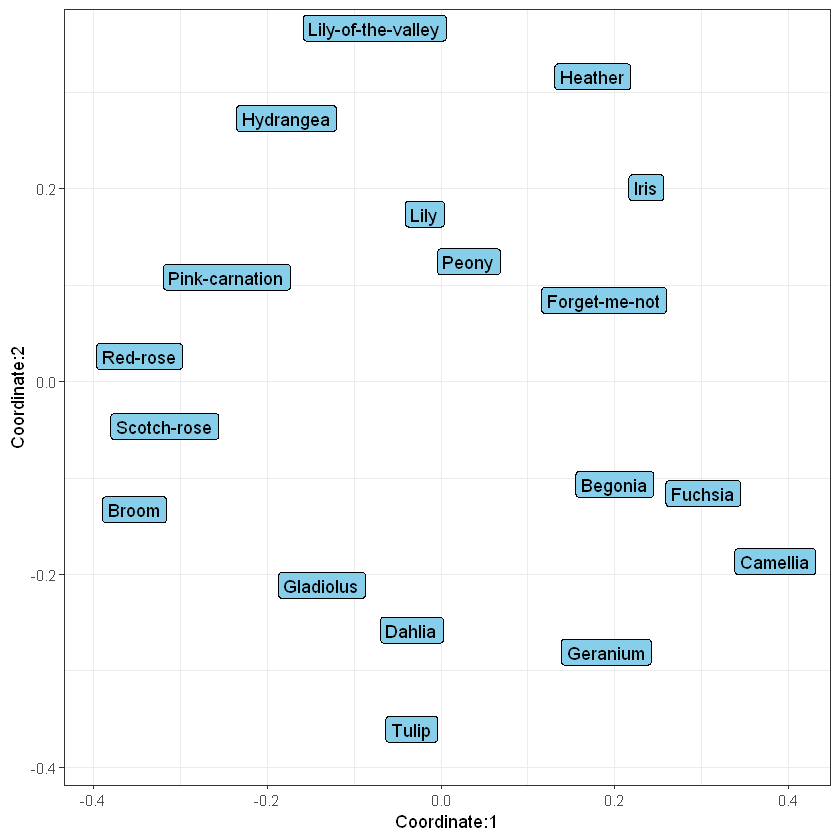

In [105]:
Dims %>%
ggplot(aes(x = `Coordinate:1`, y = `Coordinate:2`)) +
geom_label_repel(aes(label = Flowers), fill = "skyblue") + theme_bw()